In [1]:
import os
os.environ['USE_PYGEOS'] = '0'
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from pathlib import Path

In [2]:
path = Path('Z:/nahaUsers/casadje/datasets/hDMS/stations/GIS')

In [28]:
stations = pd.read_csv(path / 'station_rivers.csv', sep=';', index_col='EFAS_ID', low_memory=False)
stations.columns = stations.columns.str.upper()
stations = gpd.GeoDataFrame(
    stations,
    geometry=[Point(xy) for xy in zip(stations.LONGITUDE_WGS84, stations.LATITUDE_WGS84)],
    crs='epsg:4326'
)
stations.loc[stations.HEIGHT_UNITS == 'cm', 'HEIGHT'] /= 100

In [13]:
stations.rename(
    columns={
        'NAME': 'NAME',
        'NATIONAL_STATION_IDENTIFIER': 'LOCAL_ID',
        'PROVIDER_ID': 'PROV_ID'
        'COUNTRY-CODE': 'COUNTRY_ID',
        'BASIN_ENGLISH': 'BASIN_EN',
        'BASIN_LOCAL': 'BASIN_LOC',
        'RIVERNAME_ENGLISH': 'RIVER_EN',
        'RIVERNAME_LOCAL': 'RIVER_LOC',
        'LATITUDE_WGS84': 'X',
        'LONGITUDE_WGS84': 'Y',
        'HEIGHT': 'Z',
        'CATCHMENT_AREA': 'CATCH_SKM',
        'DATE_OF_REGISTRATION': 'REGISTERED',
        'DATE_OF_STARTING_MEASUREMENT': 'DATE_START',
        'DATE_OF_ENDING_MEASUREMENT': 'DATE_END',
        'CALIBRATION_ID': 'CALIB_ID',
        'LAST_CHANGE_COMMENT': 'LAST_COMME',
        'HAS_RTDATA': 'DATA_RT',
        'HAS_HISTORICAL_DATA': 'DATA_HIST',
    },
    inplace=True
)

In [31]:
stations.TYPE.value_counts()

RIVER        16319
RESERVOIR      547
Name: TYPE, dtype: int64

In [29]:
stations.columns.tolist()

['TYPE',
 'ALIVE',
 'EFAS',
 'GLOFAS',
 'HAS_RTDATA',
 'HAS_HISTORICAL_DATA',
 'NAME',
 'NATIONAL_STATION_IDENTIFIER',
 'INTERNAL_NATIONALSTATIONIDENTIFIER',
 'PROVIDER_ID',
 'COUNTRY-CODE',
 'STATE',
 'COUNTRY',
 'BASIN_ENGLISH',
 'BASIN_LOCAL',
 'RIVERNAME_LOCAL',
 'RIVERNAME_ENGLISH',
 'CATCHMENT_AREA',
 'CATCHMENT_AREA_UNITS',
 'LOCATION_ON_RIVER_KM',
 'LATITUDE_WGS84',
 'LONGITUDE_WGS84',
 'COORDINATES_CHECKED',
 'HEIGHT',
 'HEIGHT_UNITS',
 'HEIGHT_REFERENCE_SYSTEM',
 'LATITUDE_GEODESIC',
 'LONGITUDE_GEODESIC',
 'GEODESIC_REFERENCE_SYSTEM',
 'HORIZONTAL_DATUM_INFO',
 'VERTICAL_DATUM',
 'X-COORDINATE',
 'Y-COORDINATE',
 'LOCAL_REFERENCE_SYSTEM',
 'LOCAL_PROJECTION_INFO',
 'POSITION-ACCURACY',
 'DELIVERY_POLICY',
 'DATE_OF_STARTING_MEASUREMENT',
 'DATE_OF_ENDING_MEASUREMENT',
 'WEB_SITE',
 'DATE_OF_REGISTRATION',
 'CALIBRATION_ID',
 'LAST_CHANGE_COMMENT',
 'COMMENT',
 'D_NRT_REPORTING_PERIOD',
 'D_NRT_AGGREGATION_INTERVAL',
 'D_NRT_AGGREGATION_OFFSET',
 'D_HAS_RTDATA',
 'D_HAS_HISTO

<AxesSubplot:>

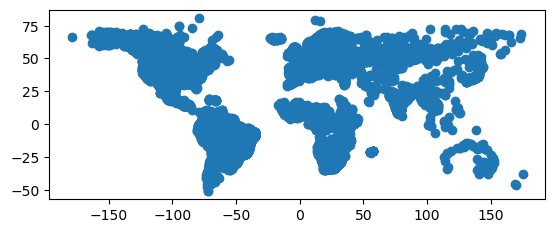

In [9]:
stations.plot()

In [25]:
stations.Location_on_River_KM.notnull().sum()

277

In [ ]:
cols = ['Type', 'Alive', 'EFAS', 'GloFAS', 'NAME', 'LOCAL_ID', 'PROV_ID', 'COUNTRY_ID', 'BASIN_EN', 'BASIN_LOC', 'RIVER_EN', 'RIVER_LOC', 'X', 'Y', 'Z', 'CATCH_SKM' 
         , 'Has_RTData', 'Has_Historical_Data'
 

 'Date_of_Starting_Measurement',
 'Date_of_Ending_Measurement',
 'Date_of_Registration',
 'Calibration_ID',
 'Last_Change_Comment',
 'Comment',
 'geometry']]